# CM and ROC

以 sklearn.datasets 的模擬數據功能，製造測試資料。並以 Logistic Regression 及 SVM  兩個演算法為例，展示混淆矩陣和 ROC 曲線的製作方法。(本文件於舊硬碟中拯救出來，特此銘記。)


- actualizado en el <font size=5 color="firebrick">veintiuno de julio </font> de 2021

In [ ]:
import datetime as dt
import time
# from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import pytz

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)


# 新版 print_now()  2021/07/20

def print_now() -> None:
    print('Local Time = ', \
        dt.datetime.now(pytz.timezone('Asia/Taipei')))
    
print('\nModule: Confusion matrix and ROC')
print_now()


Module: Confusion matrix and ROC
Local Time =  2021-07-21 00:02:20.062479+08:00


In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=2, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
from sklearn.datasets import make_blobs, make_circles, make_moons, make_classification

import matplotlib.pyplot as plt

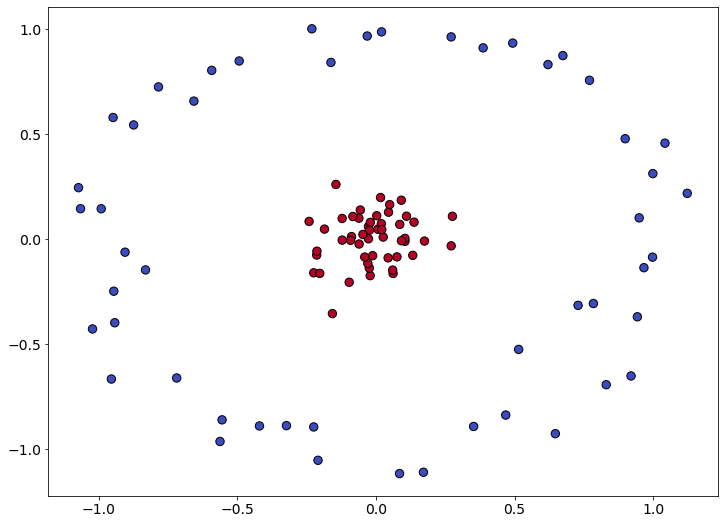

In [ ]:
# X, y = make_blobs( n_samples = 50, centers = 2, random_state=0, cluster_std=0.6)
X, y  = make_circles(100, factor=.1, noise=.1)

# X,y = make_moons(n_samples = 100, noise=0.15, random_state=42)

fig, ax = plt.subplots(figsize= (12, 9))

ax.scatter(X[:, 0], X[:,1], c = y, cmap = 'coolwarm', s = 70, edgecolor = 'k')

## Logistic Regression

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_precision_recall_curve, plot_roc_curve
from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.rcParams.update({'font.size': 14})


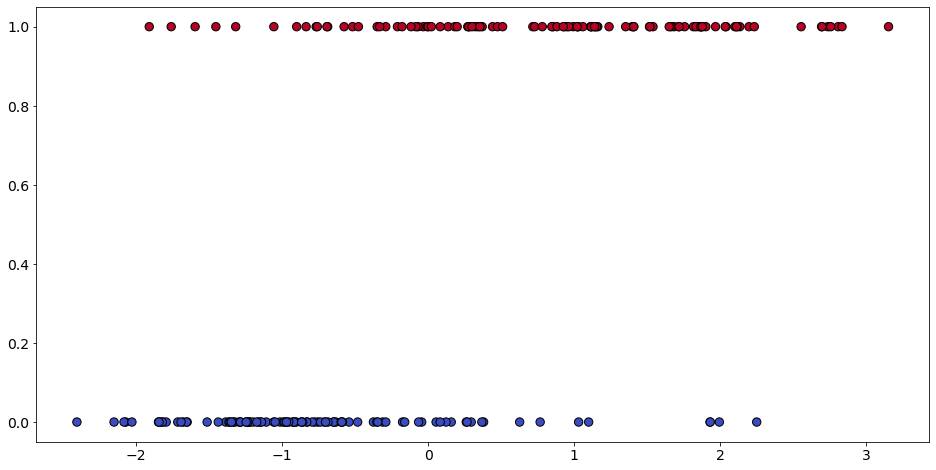

In [ ]:
x, y = make_classification( n_samples = 200, n_features = 1, n_classes = 2,
        n_clusters_per_class = 1,
        flip_y = 0.3, n_informative = 1, n_redundant = 0, n_repeated = 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)
fig, ax = plt.subplots(figsize= (16, 8))

ax.scatter(x, y, c = y, cmap = 'coolwarm', s = 70, edgecolor = 'k')

In [ ]:
%%time
model = LogisticRegression(max_iter=200, solver='lbfgs')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rep = classification_report(y_test, y_pred)
# print(rep)

CPU times: user 7.72 ms, sys: 0 ns, total: 7.72 ms
Wall time: 12.7 ms


In [ ]:
y_prob_scores_train = model.predict_proba(x_train)[:,1]
y_prob_scores_test = model.predict_proba(x_test)[:,1]

In [ ]:
import numpy as np
xdomain = np.arange(min(x[:,0]), max(x[:,0]), step = 0.01)
y_scores = model.predict_proba(xdomain.reshape(-1, 1))[:,1]

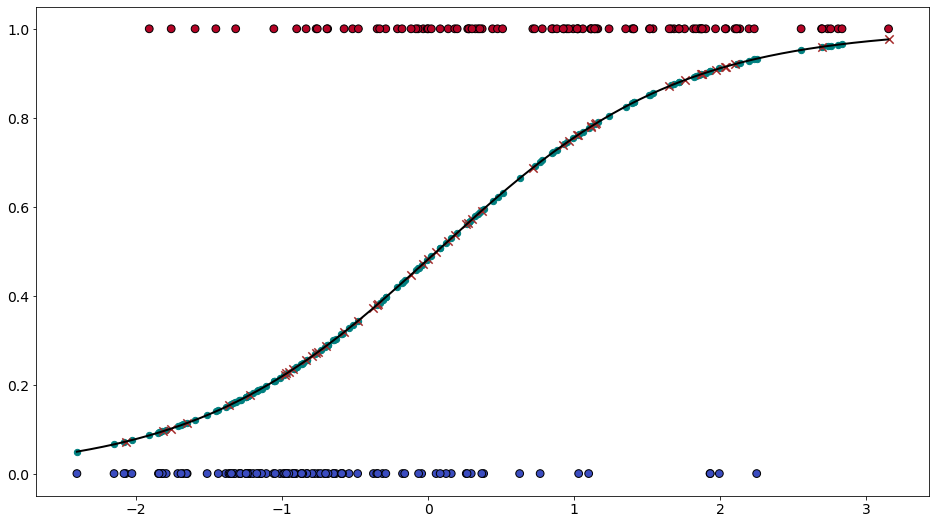

In [ ]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.scatter(x, y, c = y , cmap = 'coolwarm', edgecolor = 'k', s = 60)
ax.scatter(x_train, y_prob_scores_train, c = 'teal', s = 40)
ax.scatter(x_test, y_prob_scores_test, c = 'brown', marker = 'x', s = 70)
ax.plot(xdomain, y_scores, c = 'k', lw = 2)
# output_fig('lr')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'accuracy={accuracy_score(y_test, y_pred)}')
print(f'precision={precision_score(y_test, y_pred)}')
print(f'recall={recall_score(y_test, y_pred)}')
print(f'f1={f1_score(y_test, y_pred)}')

accuracy=0.8
precision=0.9230769230769231
recall=0.75
f1=0.8275862068965517


In [ ]:
rep = classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.67      0.89      0.76        18
           1       0.92      0.75      0.83        32

    accuracy                           0.80        50
   macro avg       0.79      0.82      0.79        50
weighted avg       0.83      0.80      0.80        50



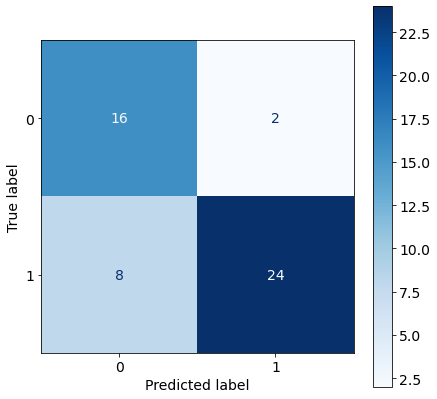

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(model, x_test, y_test, cmap = 'Blues', ax=ax)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(type(cm))


[[16  2]
 [ 8 24]]
<class 'numpy.ndarray'>


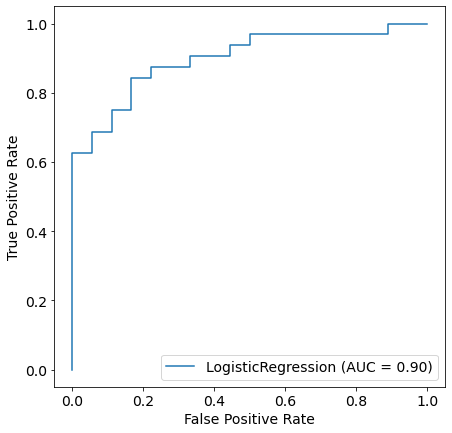

In [ ]:
from sklearn.metrics import plot_roc_curve

fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(model, x_test, y_test, ax = ax)


In [ ]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test, y_prob_scores_test)

print(score)


0.8993055555555556


# SVM with RBF kernel

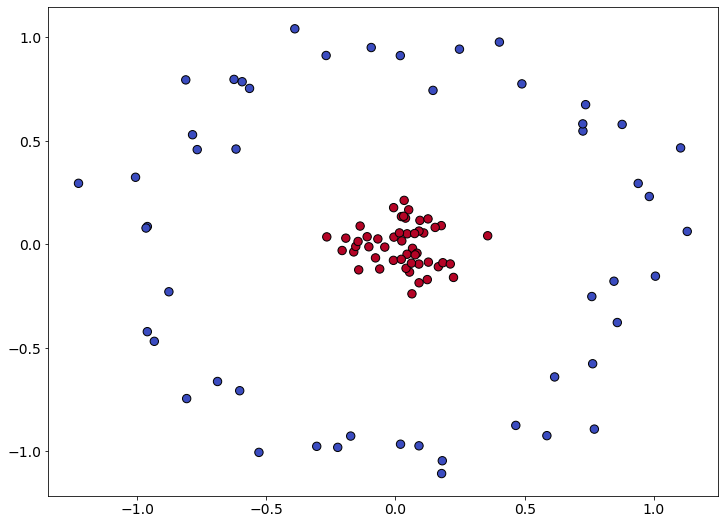

In [ ]:
# X, y = make_moons(n_samples = 100, noise=0.15, random_state=42)
from sklearn.datasets import make_circles, make_moons
X, y  = make_circles(100, factor=.1, noise=.1)

fig, ax = plt.subplots(figsize= (12, 9))
ax.scatter(X[:, 0], X[:,1], c = y, cmap = 'coolwarm', s = 70, edgecolor = 'k')

In [ ]:
from sklearn.svm import SVC

model_linear = SVC(kernel = 'linear').fit(X, y)
y_pred_linear = model_linear.predict(X)
rep_linear = classification_report(y, y_pred_linear)

model_rbf = SVC(kernel = 'rbf').fit(X, y)
y_pred_rbf = model_rbf.predict(X)
rep_rbf = classification_report(y, y_pred_rbf)

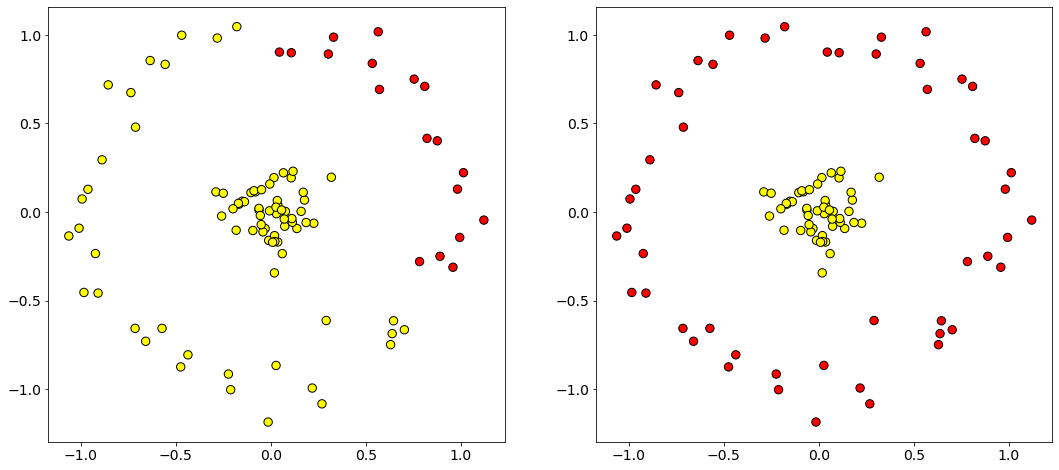

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].scatter(X[:, 0], X[:, 1], c = y_pred_linear, cmap = 'autumn', edgecolor = 'k', s = 70)
ax[1].scatter(X[:, 0], X[:, 1], c = y_pred_rbf, cmap = 'autumn', edgecolor = 'k', s = 70)

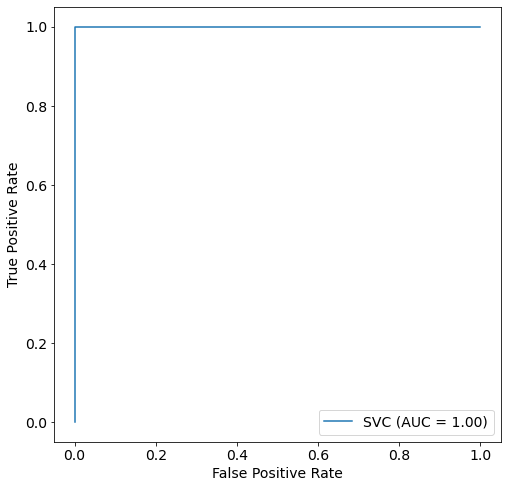

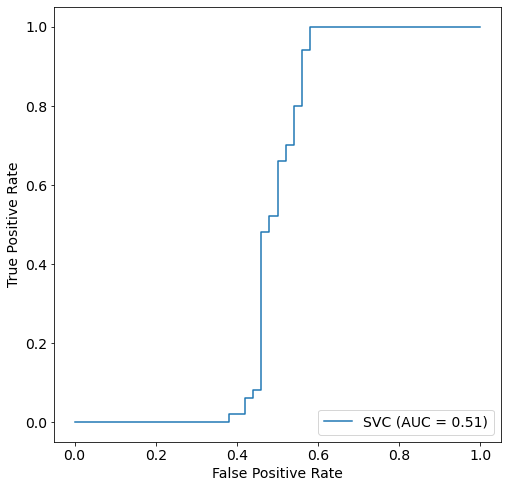

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
plot_roc_curve(model_rbf, X, y, ax = ax)
fig,ax = plt.subplots(figsize=(8,8))
plot_roc_curve(model_linear, X, y, ax = ax)

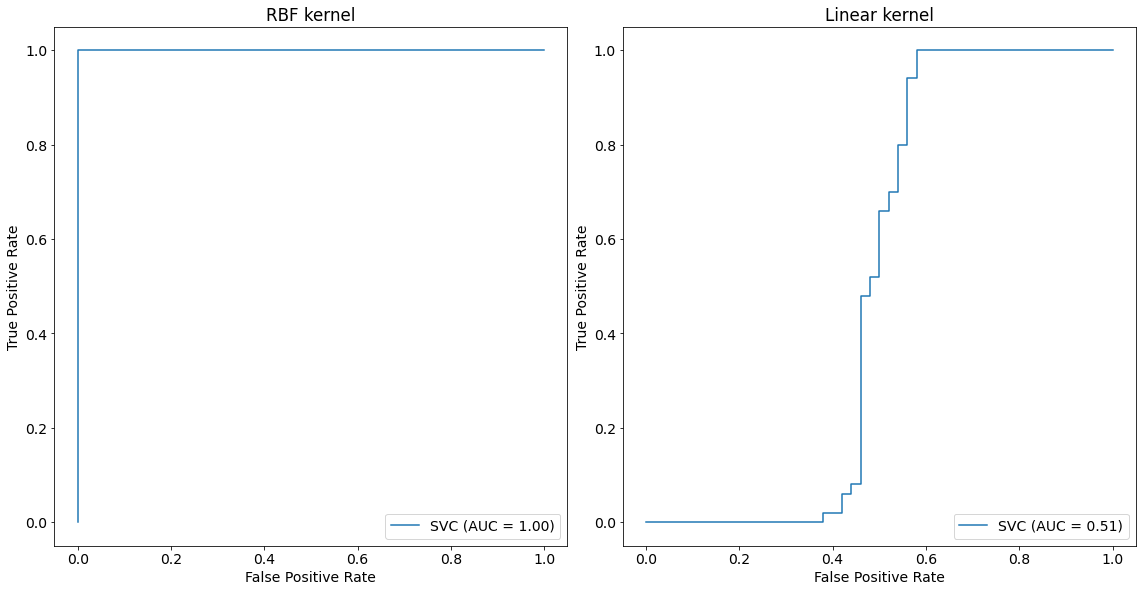

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
plt.tight_layout()
ax[0].set_title('RBF kernel')
plot_roc_curve(model_rbf, X, y, ax = ax[0])

ax[1].set_title('Linear kernel')
plot_roc_curve(model_linear, X, y, ax = ax[1])

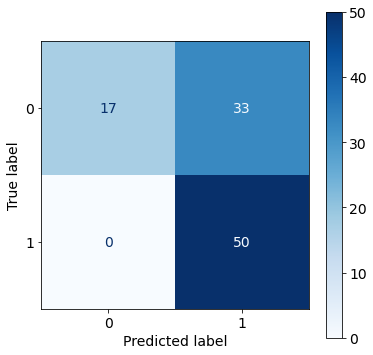

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(model_linear, X, y, ax = ax, cmap = 'Blues')

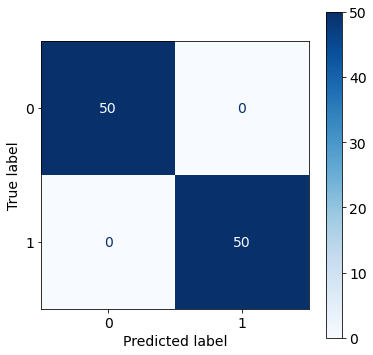

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(model_rbf, X, y, ax = ax, cmap = 'Blues')